# Binomial model - Case studies

# _Josep Fortiana  &emsp;&emsp;&emsp;&emsp;&emsp;   2023-03-13_

# Case study 1: Perchlorate and Thyroid Tumors

Data for this example come from an online presentation by David Dunson at the US National Institute for Environmental Health Sciences. 

Perchlorate is a ground water contaminant that has been associated with thyroid tumors. 

In a study, 2 of 30 lab rats exposed to perchlorate developed thyroid tumors, compared to 0 of 30 control rats.

What conclusions can be drawn?

Given the small numbers, there are difficulties in the classical framework, for instance, because of the zero value a confidence interval collapses to infinity. What can we learn from a Bayesian approach? 

Clearly for each group, **Exposed to Perchlorate** and **Control** rats, the likelihood (for the observed variable, the number of rats developing a tumor) is Binomial and we want to learn about possible different properties (i.e. probability distribution) of the probability parameter in both groups.

In a first run we take a $\mbox{Unif}(0,1)=\mbox{Beta}(1,1)$ prior as a NIP. 

In [1]:
# data
y.perchlorate <- 2; n.perchlorate <- 30
y.control <- 0; n.control<- 30

In [2]:
# update Beta(1,1) prior for exposed and unexposed
N<-20000  # sample size for simulations
theta.perchlorate <- rbeta(N,y.perchlorate+1,n.perchlorate-y.perchlorate+1)
theta.control <- rbeta(N,y.control+1,n.control-y.control+1)

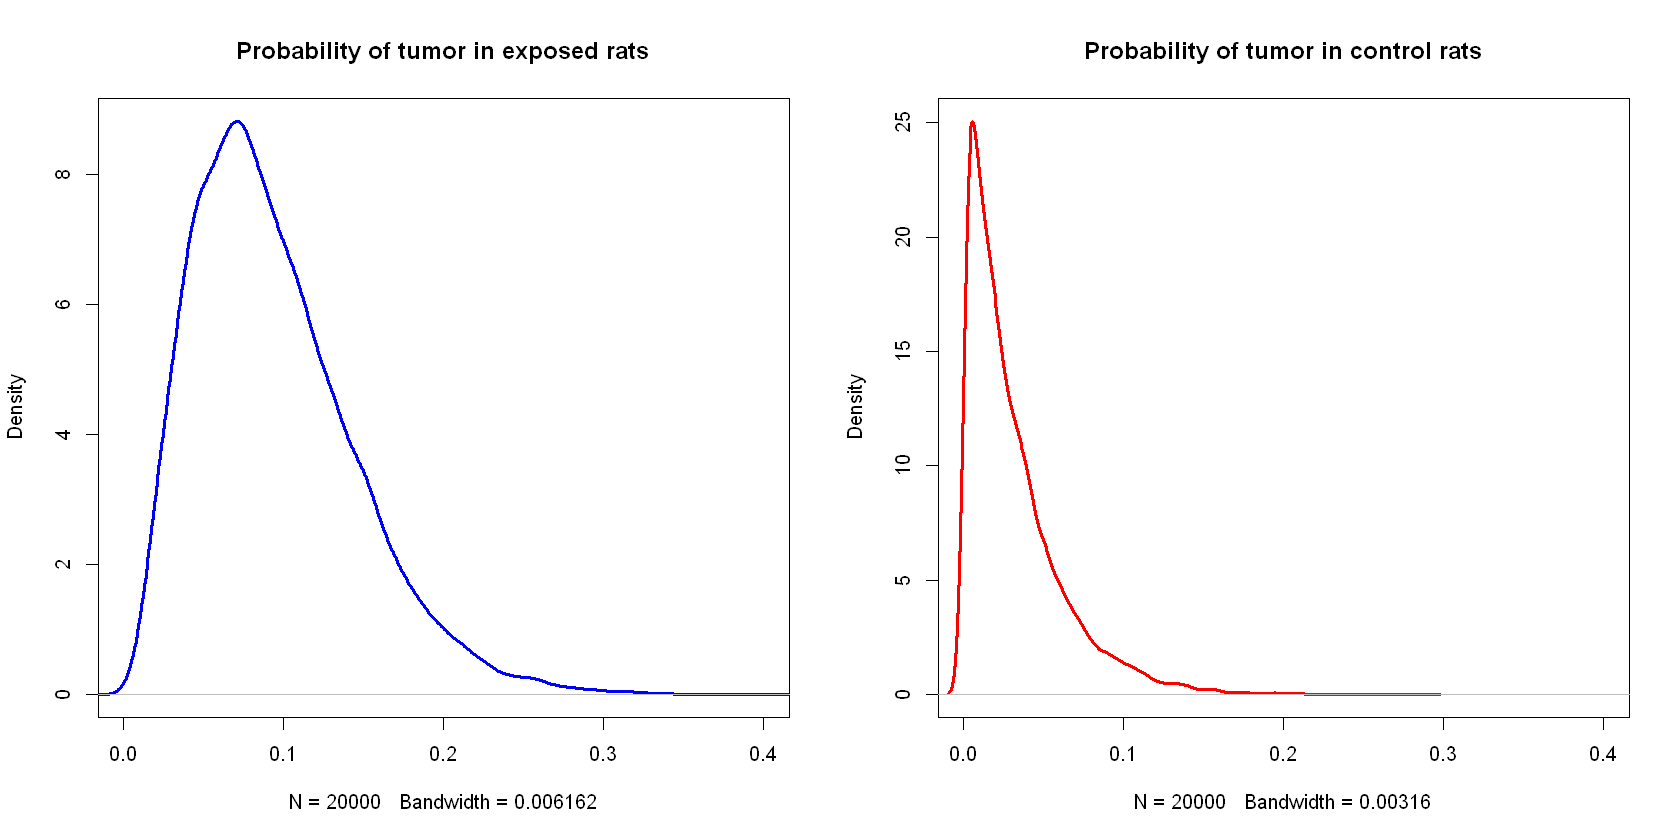

In [3]:
# graphically compare exposed and unexposed
options(repr.plot.width=14,repr.plot.height=7)
old.par<-par(mfrow=c(1,2))
plot(density(theta.perchlorate), xlim=c(0,0.4),lwd=2.5,col="blue",main="Probability of tumor in exposed rats")
plot(density(theta.control),lwd=2.5,col="red",xlim=c(0,0.4),main="Probability of tumor in control rats")
par(old.par)

In [4]:
# probability that exposed have more tumors than unexposed
sum(theta.perchlorate >= theta.control)/N

[1] 0.88045

A 90% credible interval for the difference of probabilities and an estimation of the pdf of this difference. The interval includes zero, so it is consistent with the non-significance of the difference (from Fisher’s exact test, see reference). But the majority of the probability lies above zero. 

In [5]:
theta.diff<-theta.perchlorate-theta.control
str(theta.diff)

 num [1:20000] 0.0413 0.1796 0.0335 0.0708 -0.0392 ...


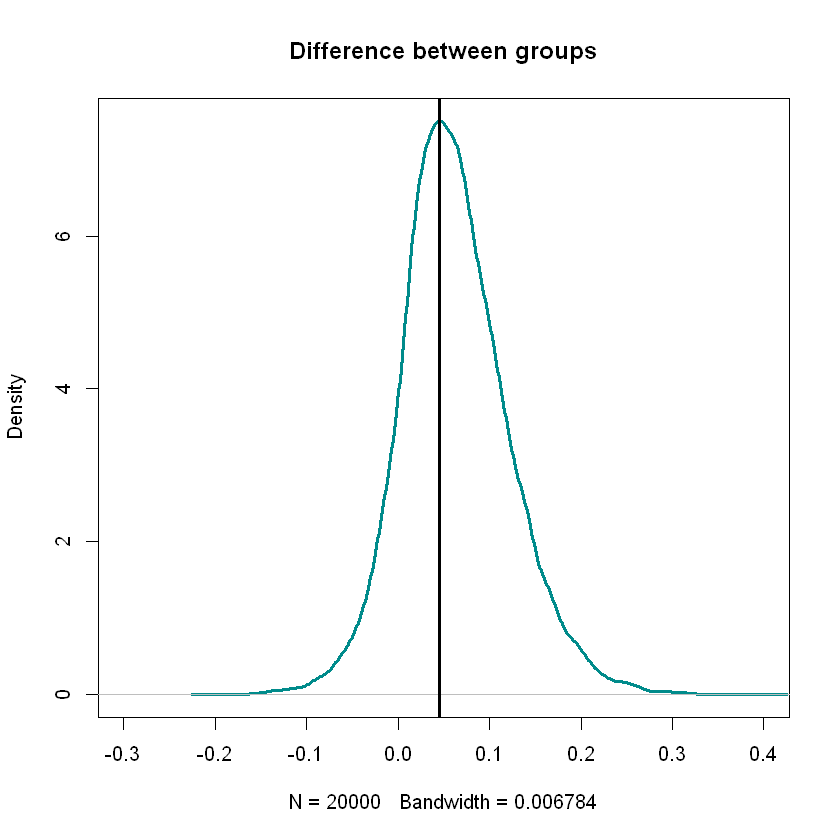

In [6]:
# graphically compare exposed and unexposed
options(repr.plot.width=7,repr.plot.height=7)
theta.diff.density<-density(theta.diff)
max.theta.diff<-theta.diff.density$x[which.max(theta.diff.density$y)]
plot(theta.diff.density,xlim=c(-0.3,0.4),lwd=2.5,col="DarkCyan", main="Difference between groups")
abline(v=max.theta.diff,lwd=2.5,col="black")

In [7]:
round(max.theta.diff,3)

[1] 0.045

In [8]:
# 90% credible interval
round(quantile(theta.diff, probs=c(0.05,0.95)),3)

5%    95% 
-0.025  0.165

If we have some real prior evidence or belief about the putative association of perchlorate and thyroid tumors. It would be reasonable to assume that we do. Why else would we be doing this experiment in the first place? 

Dr. Dunson, in his presentation, suggests a $\mbox{Beta}(0.11, 2.6)$ as representing previous experimental evidence. 

Let’s use that prior, and combine it with our data to update the posterior.

In [9]:
theta.perchlorate <- rbeta(N,y.perchlorate+0.11,n.perchlorate-y.perchlorate+2.6)
theta.control <- rbeta(N,y.control+.11,n.control-y.control+2.6)
theta.diff<-theta.perchlorate-theta.control
round(quantile(theta.diff, probs=c(0.05,0.95)),3)

5%   95% 
0.008 0.144